# **Data Exploration**


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [ ]:
# Load the data
df = pd.read_csv('/content/creditcard.csv')

In [ ]:
print(df.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114962 entries, 0 to 114961
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    114962 non-null  int64  
 1   V1      114962 non-null  float64
 2   V2      114962 non-null  float64
 3   V3      114962 non-null  float64
 4   V4      114962 non-null  float64
 5   V5      114962 non-null  float64
 6   V6      114962 non-null  float64
 7   V7      114962 non-null  float64
 8   V8      114962 non-null  float64
 9   V9      114962 non-null  float64
 10  V10     114962 non-null  float64
 11  V11     114962 non-null  float64
 12  V12     114961 non-null  float64
 13  V13     114961 non-null  float64
 14  V14     114961 non-null  float64
 15  V15     114961 non-null  float64
 16  V16     114961 non-null  float64
 17  V17     114961 non-null  float64
 18  V18     114961 non-null  float64
 19  V19     114961 non-null  float64
 20  V20     114961 non-null  float64
 21  V21     11

In [ ]:
print(df.describe())

                Time             V1             V2             V3  \
count  114962.000000  114962.000000  114962.000000  114962.000000   
mean    46081.803161      -0.254307      -0.014474       0.680756   
std     18497.491852       1.840512       1.635453       1.299923   
min         0.000000     -56.407510     -72.715728     -33.680984   
25%     35135.000000      -1.021267      -0.588758       0.175474   
50%     47926.000000      -0.262408       0.085671       0.755424   
75%     61141.750000       1.155544       0.750077       1.377493   
max     73691.000000       1.960497      18.902453       4.226108   

                  V4             V5             V6             V7  \
count  114962.000000  114962.000000  114962.000000  114962.000000   
mean        0.155588      -0.283222       0.093060      -0.115141   
std         1.337298       1.336326       1.295536       1.195872   
min        -5.172595     -42.147898     -26.160506     -31.764946   
25%        -0.706585      -0.9045

In [ ]:
# Check for missing values
print(df.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64


# **Data Visualization**

In [ ]:
def visualize_data(df):
    # Histogram of transaction amounts
    plt.figure(figsize=(10, 6))
    plt.hist(df[df['Class'] == 0]['Amount'], bins=50, alpha=0.5, label='Non-Fraudulent')
    plt.hist(df[df['Class'] == 1]['Amount'], bins=50, alpha=0.5, label='Fraudulent')
    plt.xlabel('Transaction Amount')
    plt.ylabel('Frequency')
    plt.title('Distribution of Transaction Amounts')
    plt.legend()
    plt.show()

    # Time series plot of transaction frequency
    df['Hour'] = df['Time'].apply(lambda x: (x / 3600) % 24)
    plt.figure(figsize=(12, 6))
    sns.lineplot(x='Hour', y='Class', data=df)
    plt.xlabel('Hour of Day')
    plt.ylabel('Fraud Rate')
    plt.title('Fraud Rate by Hour of Day')
    plt.show()

    # Scatter plot of key numerical features
    plt.figure(figsize=(12, 8))
    sns.scatterplot(x='V1', y='V2', hue='Class', data=df)
    plt.title('Scatter Plot of V1 vs V2')
    plt.show()


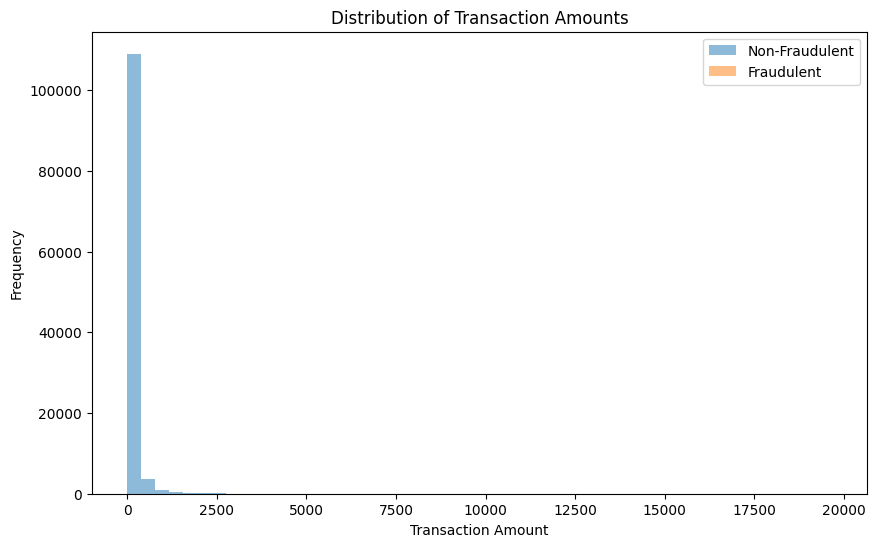

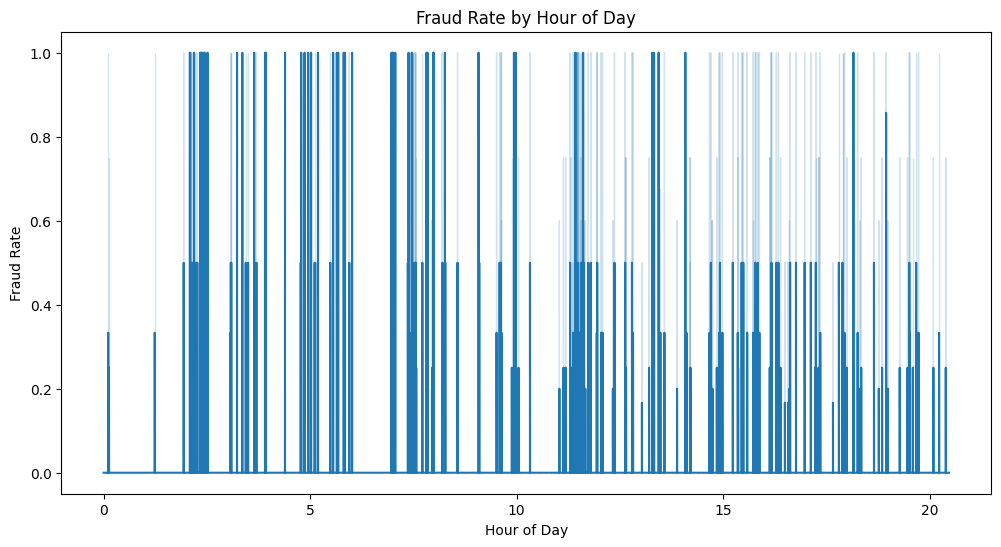

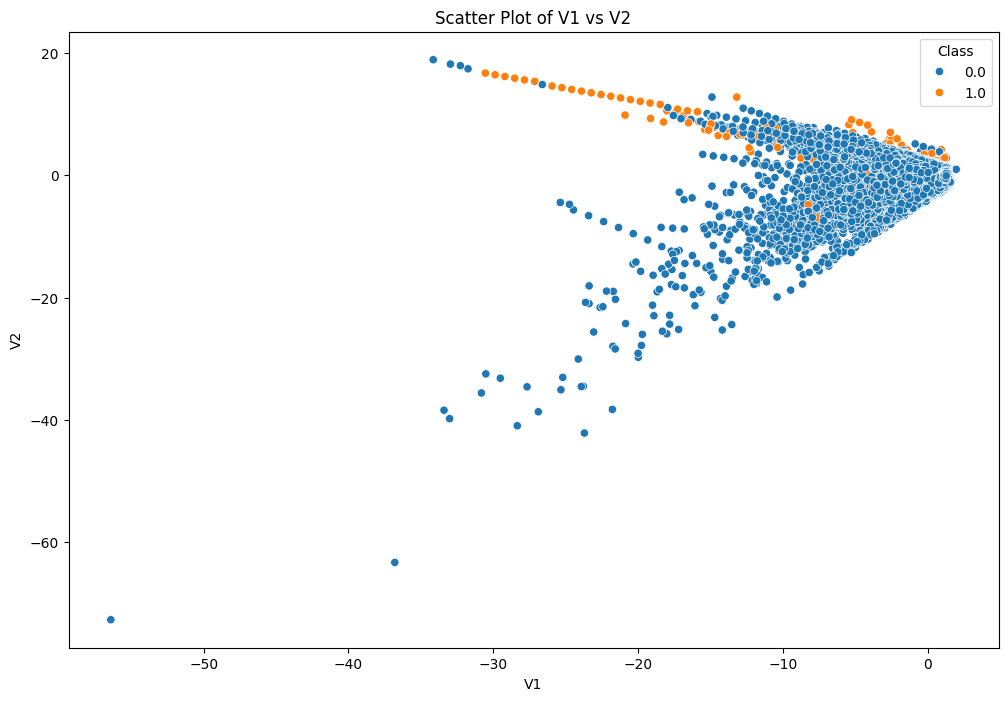

In [ ]:
visualize_data(df)

# **Distribution Analysis**

In [19]:
def analyze_distributions(df):
    # Distribution of transaction amounts
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Class', y='Amount', data=df)
    plt.title('Distribution of Transaction Amounts by Class')
    plt.show()

    # Time-based distribution of fraudulent activities
    fraud_by_hour = df[df['Class'] == 1]['Hour'].value_counts().sort_index()
    plt.figure(figsize=(12, 6))
    fraud_by_hour.plot(kind='bar')
    plt.xlabel('Hour of Day')
    plt.ylabel('Number of Fraudulent Transactions')
    plt.title('Distribution of Fraudulent Transactions by Hour')
    plt.show()

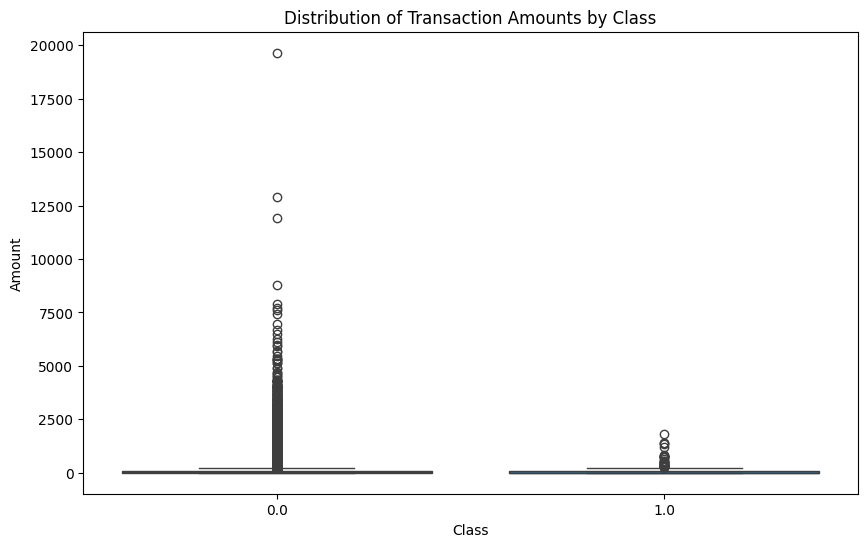

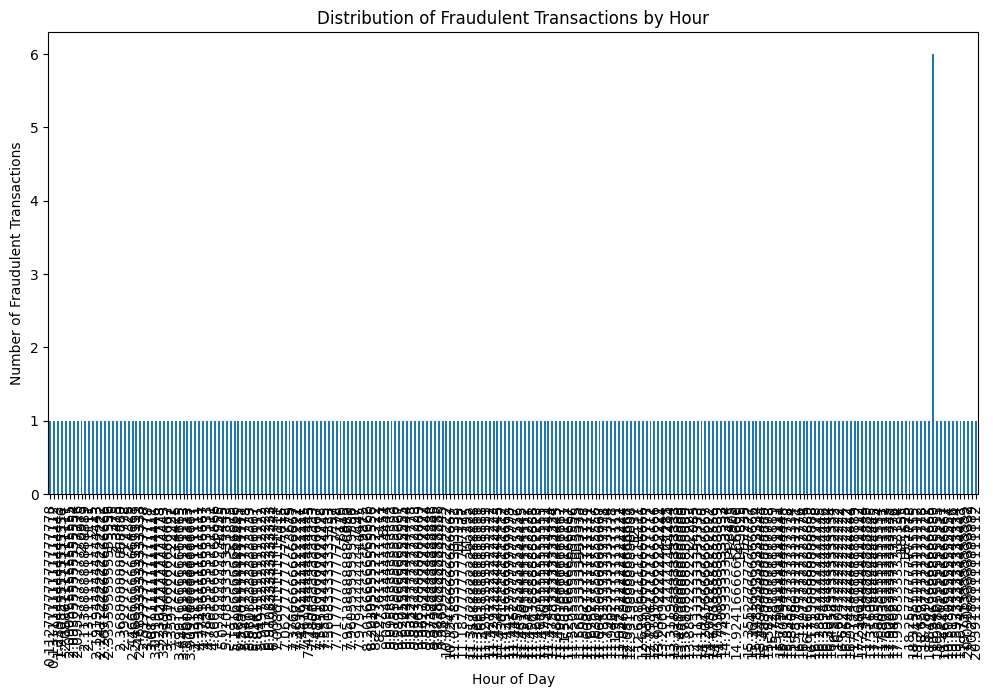

In [20]:
analyze_distributions(df)

# **Correlation Analysis**

In [21]:
def correlation_analysis(df):
    # Correlation matrix
    corr_matrix = df.corr()
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
    plt.title('Correlation Matrix of Features')
    plt.show()

    # Top correlated features with the target variable
    correlations = corr_matrix['Class'].sort_values(ascending=False)
    print("Top 10 features correlated with fraud:")
    print(correlations[1:11])  # Excluding 'Class' itself

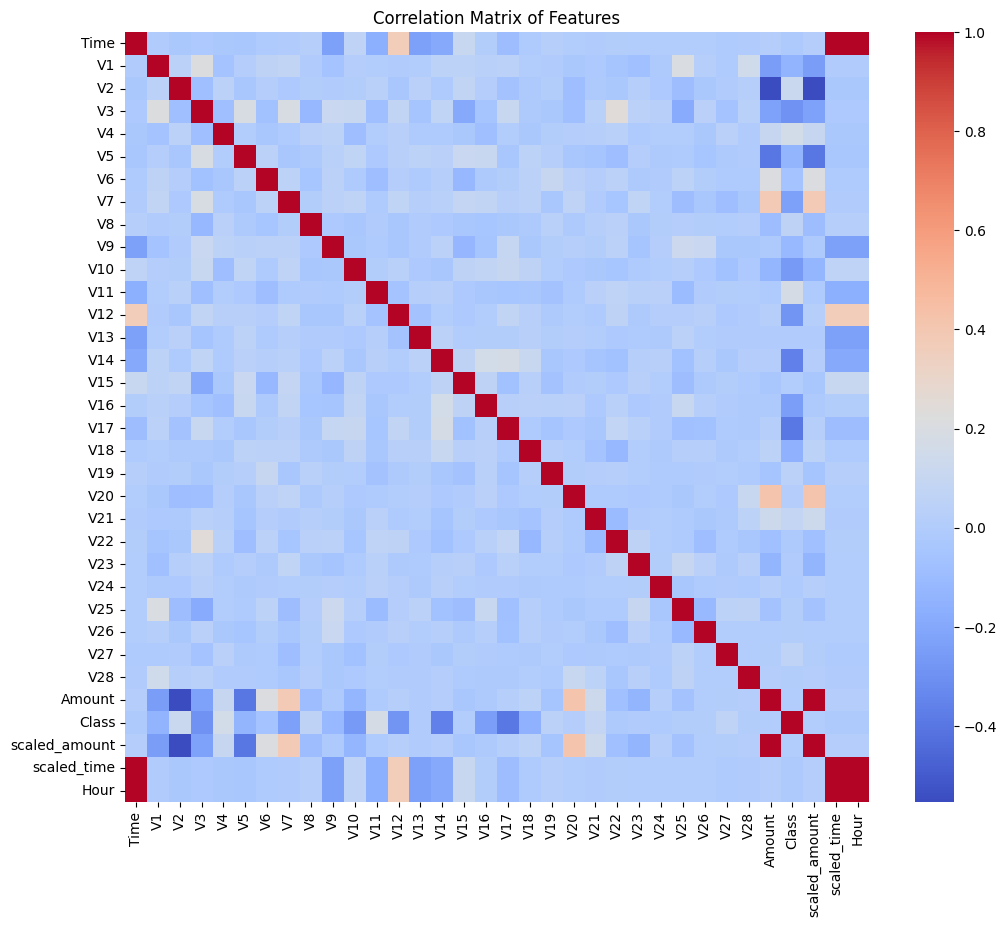

Top 10 features correlated with fraud:
V11    0.176113
V4     0.156638
V2     0.116479
V21    0.086236
V27    0.062604
V8     0.057210
V19    0.044094
V20    0.013376
V28    0.009207
V25    0.008216
Name: Class, dtype: float64


In [22]:
correlation_analysis(df)

# **Feature Importance Analysis**

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
def feature_importance(df):
    X = df.drop(['Class', 'Time'], axis=1)
    y = df['Class']

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_scaled, y)

    importances = pd.DataFrame({'feature': X.columns, 'importance': rf.feature_importances_})
    importances = importances.sort_values('importance', ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='importance', y='feature', data=importances.head(10))
    plt.title('Top 10 Most Important Features')
    plt.show()

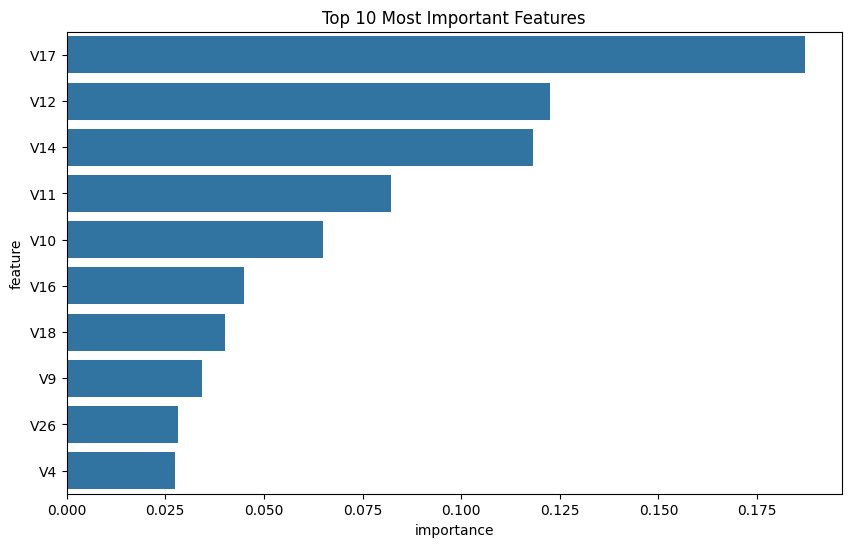

In [26]:
feature_importance(df)

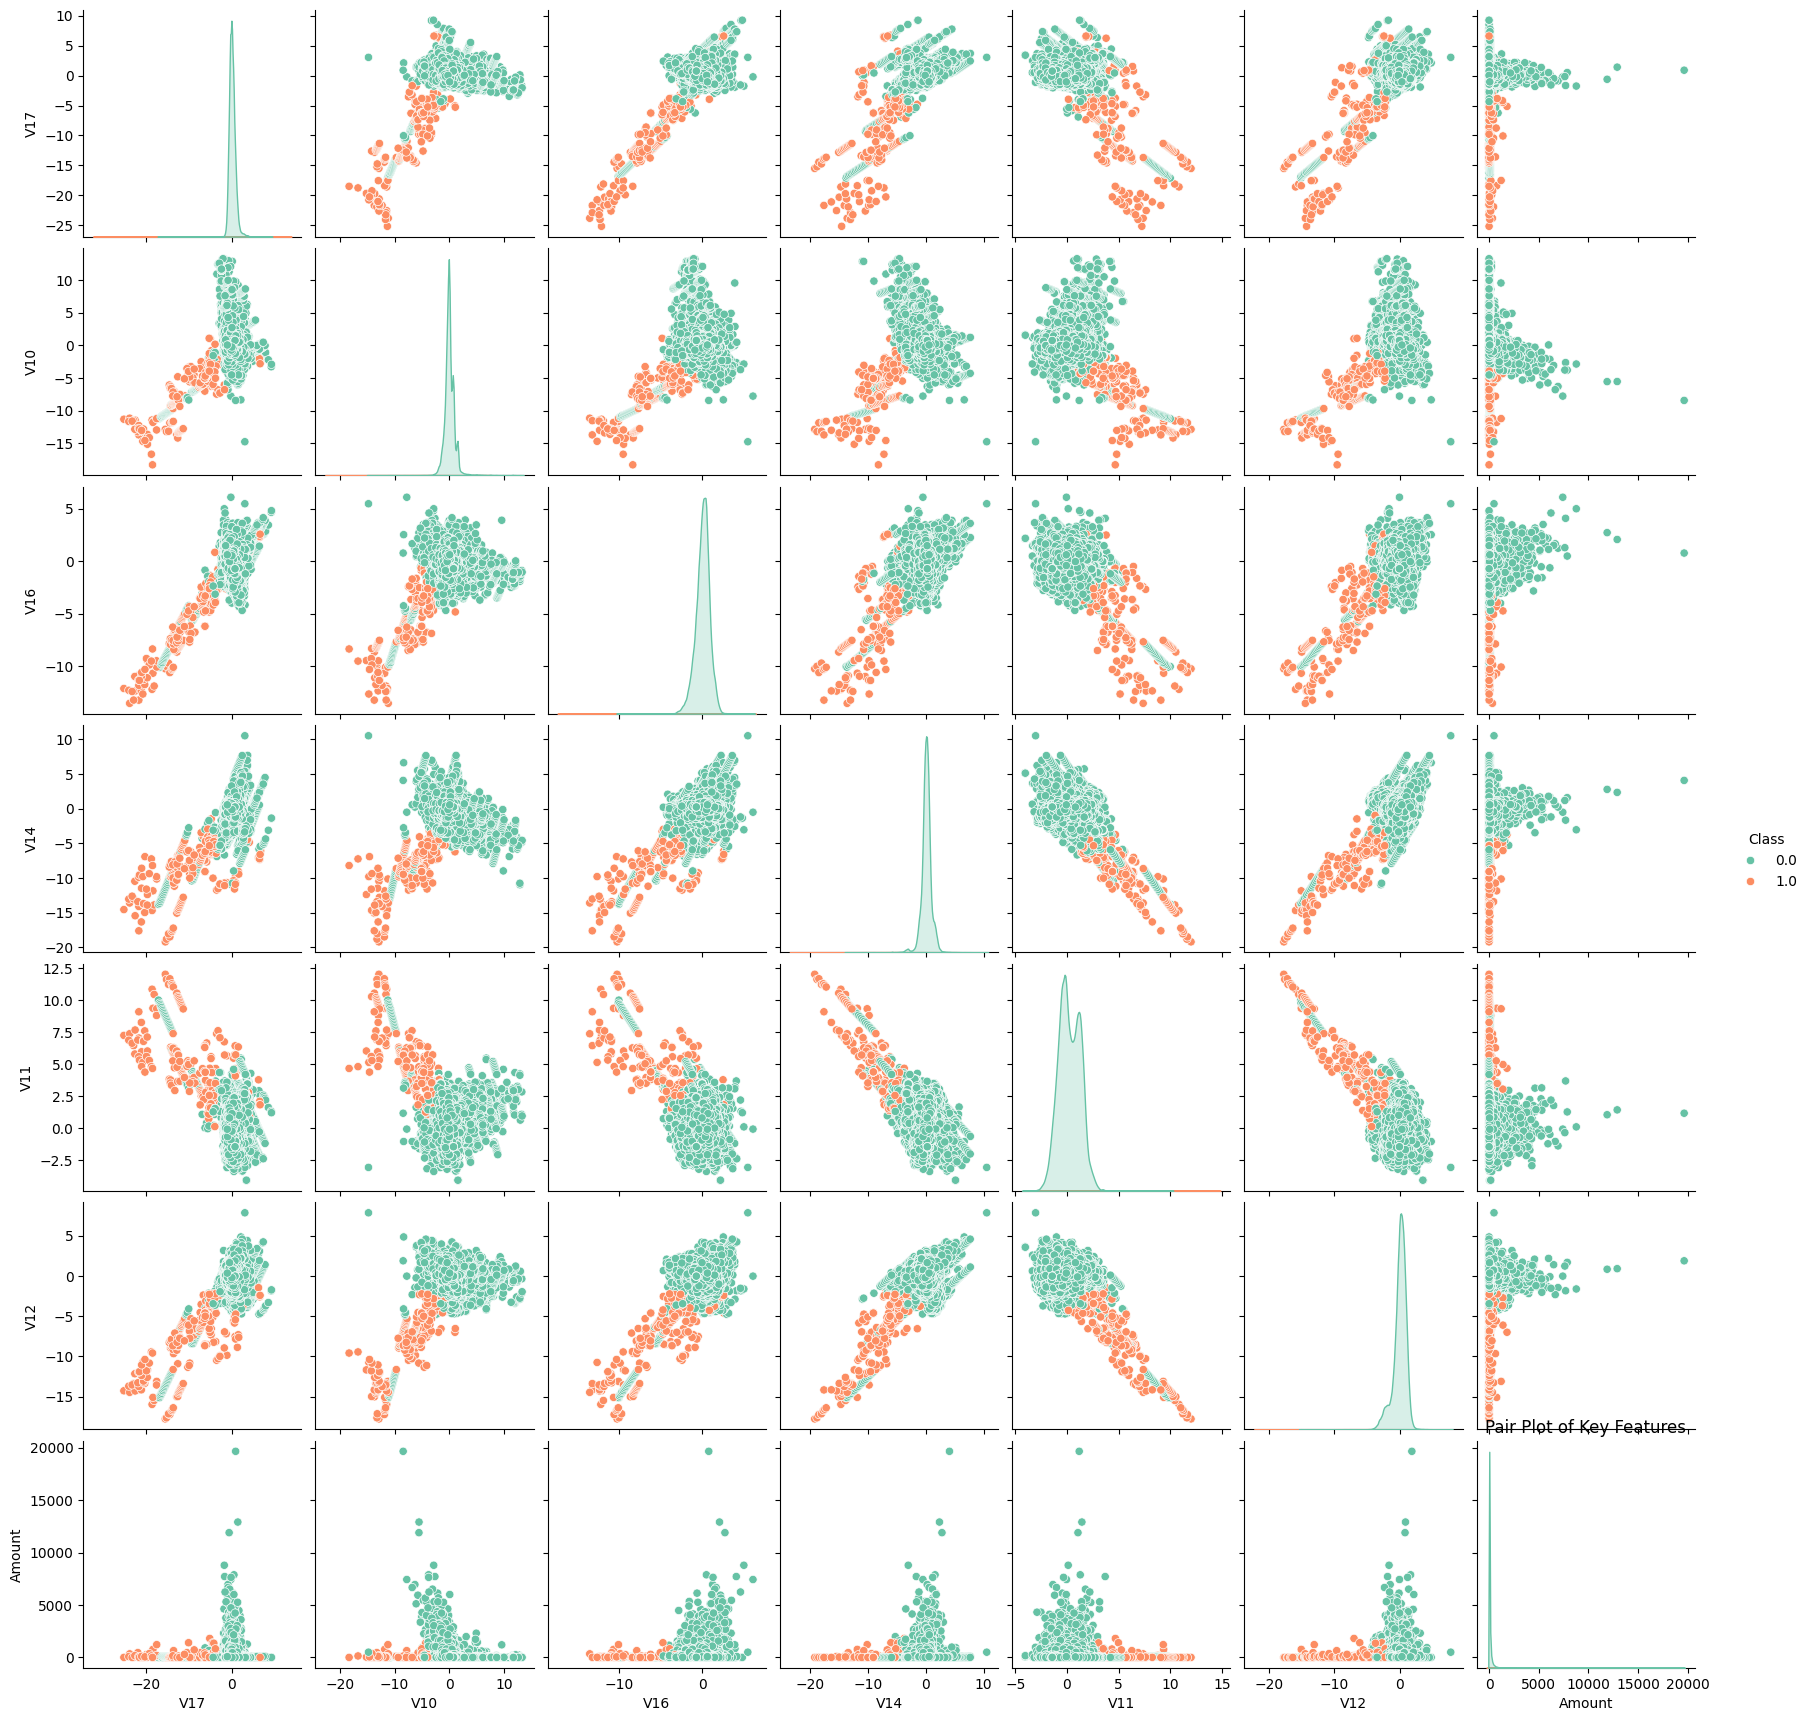

In [33]:
import seaborn as sns

# Select a subset of important features for pairplot to avoid overcrowding
important_features = ['V17', 'V10', 'V16', 'V14', 'V11', 'V12', 'Amount', 'Class']
sns.pairplot(df[important_features], hue='Class', diag_kind='kde', palette="Set2")
plt.title('Pair Plot of Key Features')
plt.show()


# **Anomaly Detection**

In [30]:
from sklearn.ensemble import IsolationForest
def detect_anomalies(df):
    X = df.drop(['Class', 'Time'], axis=1)

    iso_forest = IsolationForest(contamination=0.01, random_state=42)
    anomalies = iso_forest.fit_predict(X)

    df['anomaly'] = anomalies
    print("Number of detected anomalies:", sum(anomalies == -1))

    plt.figure(figsize=(12, 8))
    plt.scatter(df['V1'], df['V2'], c=df['anomaly'], cmap='viridis')
    plt.title('Anomalies detected by Isolation Forest')
    plt.xlabel('V1')
    plt.ylabel('V2')
    plt.colorbar(label='Anomaly (-1) vs Normal (1)')
    plt.show()

Number of detected anomalies: 1150


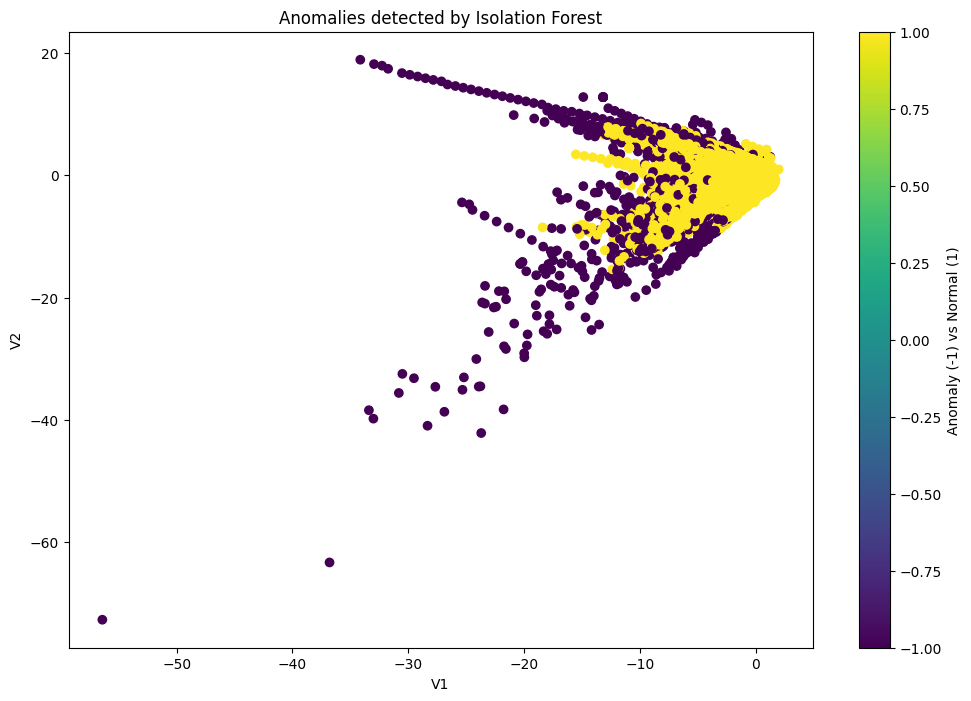

In [31]:
detect_anomalies(df)